**Ejercicio 3:** Un ingeniero industrial está estudiando el ensamblado manual de componentes electrónicos en placas de circuito. El objetivo es mejorar la velocidad de la operación de ensamblado.

- El ingeniero ha diseñado tres programaciones de ensamblado y dos disposiciones distintas del lugar de trabajo que parecen prometedoras.

- Los operadores deben realizar manualmente el ensamblaje, y se decidió seleccionar aleatoriamente cuatro operadores para cada combinación de programa/disposición.

- Debido a que los lugares de trabajo están en diferentes ubicaciones dentro de la planta, es difı́cil usar los mismos cuatro operadores para cada combinación. Por lo tanto, los cuatro operadores elegidos para el tratamiento 1 son individuos diferentes a los cuatro operadores elegidos para el tratamiento 2.

- La recolección de datos fue completamente aleatoria y se obtuvieron dos réplicas. Los tiempos de ensamblado medidos en segundos encuentran en el archivo ensamblado.txt.

Entonces: 

- Anidado: el operario (O) esta anidado en la disposicion (d), 
- Cruzados: entre la programacion (p) y la disposición 
- Efectos fijos: disposicion y programación, son determinados, me intersa saber que combinación entre estas. Si fuese aleatorio esto sería un despelote la fábrica. 
- Aleatorio: operario

**Modelo:**

$$y_{ijk} = \mu + d_i + p_j + (dp)_{ij} + O_{k(i)} + \epsilon_{ijk}$$

In [1]:
datos = read.csv("/home/emiliano/EstadisticaAplicada/Estadistica.Aplicada.2018/03_efectos_aleatorios_y_mixtos/datos/ensamblado.txt", sep=" ")

In [3]:
str(datos)
attach(datos)

'data.frame':	48 obs. of  4 variables:
 $ tiempo      : int  22 23 28 25 26 27 28 24 24 24 ...
 $ disposicion : int  1 1 1 1 2 2 2 2 1 1 ...
 $ programacion: int  1 1 1 1 1 1 1 1 1 1 ...
 $ operador    : int  1 2 3 4 1 2 3 4 1 2 ...


In [4]:
disposicionf = as.factor(disposicion)
programacionf = as.factor(programacion)
operadorf = as.factor(operador)

Veamos primeramente un gráfico de interacción: 

- Inicialmente podemos interpretar que existe interacción entre entra la programación y la disposición, ya que vemos que se intersectan entre sí, aunque, las tendencias parecen similares, por lo que no sería significativa, interacción debil.

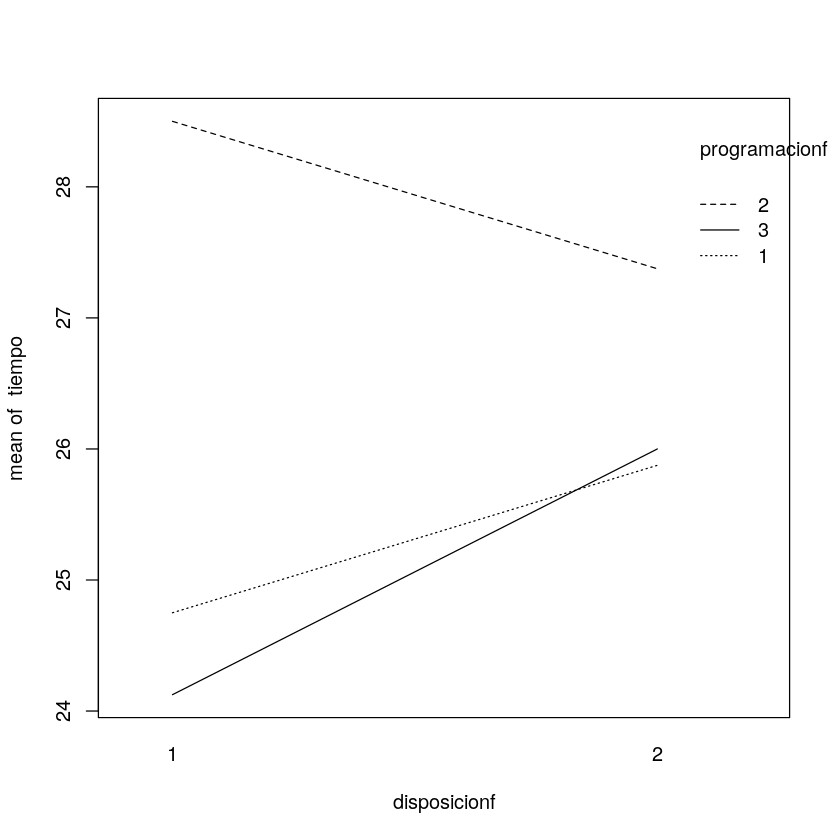

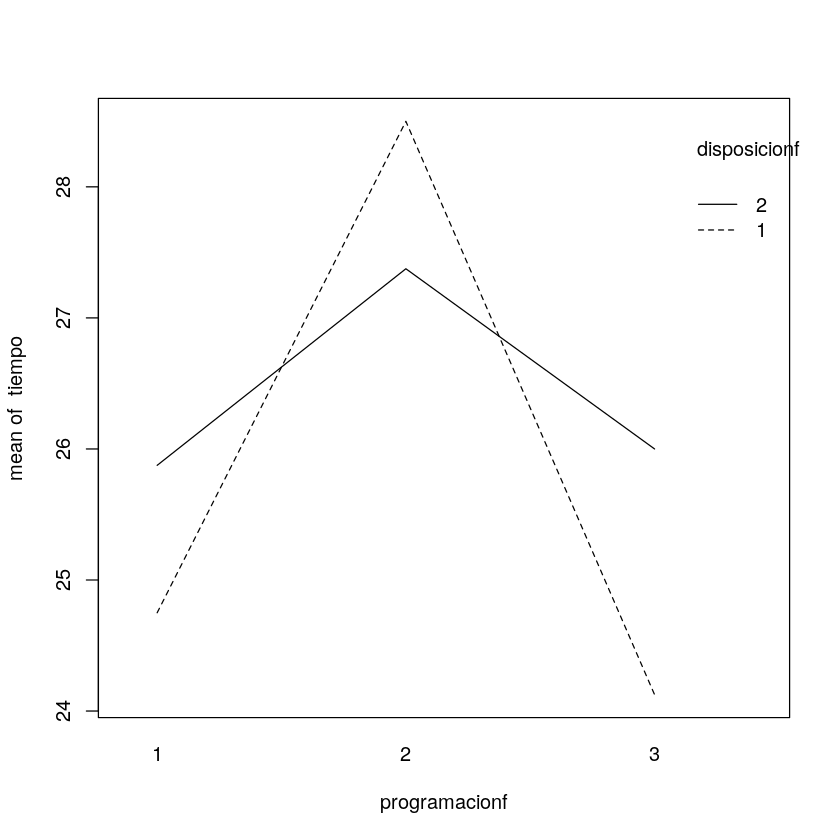

In [11]:
interaction.plot(disposicionf, programacionf, tiempo)
interaction.plot(programacionf, disposicionf, tiempo)

In [5]:
library(lme4)

Loading required package: Matrix


In [9]:
m0 = lmer(tiempo ~ programacionf*disposicionf + (1|operadorf%in%disposicionf))
summary(m0)

Linear mixed model fit by REML ['lmerMod']
Formula: 
tiempo ~ programacionf * disposicionf + (1 | operadorf %in% disposicionf)

REML criterion at convergence: 194.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.06171 -0.73633  0.02945  0.70687  2.00281 

Random effects:
 Groups                      Name        Variance  Std.Dev. 
 operadorf %in% disposicionf (Intercept) 1.159e-14 1.077e-07
 Residual                                4.503e+00 2.122e+00
Number of obs: 48, groups:  operadorf %in% disposicionf, 2

Fixed effects:
                             Estimate Std. Error t value
(Intercept)                   24.7500     0.7502  32.989
programacionf2                 3.7500     1.0610   3.534
programacionf3                -0.6250     1.0610  -0.589
disposicionf2                  1.1250     1.0610   1.060
programacionf2:disposicionf2  -2.2500     1.5005  -1.500
programacionf3:disposicionf2   0.7500     1.5005   0.500

Correlation of Fixed Effects:
            (Intr)

In [10]:
confint(m0)

Computing profile confidence intervals ...
Warning message in zetafun(np, ns):
“slightly lower deviances (diff=-2.84217e-14) detected”Warning message in FUN(X[[i]], ...):
“non-monotonic profile for .sig01”Warning message in optwrap(optimizer, par = start, fn = function(x) dd(mkpar(npar1, :
“convergence code 3 from bobyqa: bobyqa -- a trust region step failed to reduce q”Warning message in optwrap(optimizer, par = thopt, fn = mkdevfun(rho, 0L), lower = fitted@lower):
“convergence code 3 from bobyqa: bobyqa -- a trust region step failed to reduce q”Warning message in optwrap(optimizer, par = thopt, fn = mkdevfun(rho, 0L), lower = fitted@lower):
“convergence code 3 from bobyqa: bobyqa -- a trust region step failed to reduce q”Warning message in optwrap(optimizer, par = thopt, fn = mkdevfun(rho, 0L), lower = fitted@lower):
“convergence code 3 from bobyqa: bobyqa -- a trust region step failed to reduce q”Warning message in optwrap(optimizer, par = thopt, fn = mkdevfun(rho, 0L), lower = fitt

,2.5 %,97.5 %
.sig01,0.0000000,1.1673929
.sigma,1.6455283,2.4594000
(Intercept),23.3465291,26.1534709
programacionf2,1.7651925,5.7348075
programacionf3,-2.6098075,1.3598075
disposicionf2,-0.8598075,3.1098075
programacionf2:disposicionf2,-5.0569418,0.5569418
programacionf3:disposicionf2,-2.0569418,3.5569418


A partir de los IC de la varianza, vistos en la salida del modelo, podemos concluir que el efecto anidado del operario sobre la disposición no es significativo, por lo tanto nos queda analizar los efectos fijos.

Vamos a hacer por triplicado lo mismo:

- comparamos el test dejando los efectos aleatorios, pero combinando los fijos con y sin interacción
- comparamos sin tener en cuenta los efectos aleatorios, por lo que usamos ``aov`` y vemos el resultado del test
- vemos la tabla ANOVA del modelo que supone una interacción entre los efectos fijos y vemos el pvalor de esa interacción.

**Conslusión:** en todos los casos vemos que no hay interacción entre los factores fijos

In [15]:
m1 = lmer(tiempo ~ programacionf * disposicionf + (1|operadorf%in%disposicionf), REML = FALSE)
m2 = lmer(tiempo ~ programacionf + disposicionf + (1|operadorf%in%disposicionf), REML = FALSE)
anova(m1, m2)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
m2,6,218.7463,229.9735,-103.3731,206.7463,NA,NA,NA
m1,8,218.0360,233.0057,-101.0180,202.0360,4.71025,2,0.09488164


In [17]:
m1 = aov(tiempo ~ programacionf * disposicionf)
m2 = aov(tiempo ~ programacionf + disposicionf)
anova(m1, m2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
42,189.125,NA,NA,NA,NA
44,208.625,-2,-19.5,2.165235,0.1273604


In [18]:
summary(m1)

                           Df Sum Sq Mean Sq F value   Pr(>F)    
programacionf               2  81.17   40.58   9.013 0.000554 ***
disposicionf                1   4.69    4.69   1.041 0.313435    
programacionf:disposicionf  2  19.50    9.75   2.165 0.127360    
Residuals                  42 189.12    4.50                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1